In [6]:
import matplotlib.pyplot as plt
import numpy as np


In [7]:
x1=5
x2=-5
y=0.5

In [8]:
w11=np.random.randn(1)
w12=np.random.randn(1)
w21=np.random.randn(1)
w22=np.random.randn(1)
wh1=np.random.randn(1)
wh2=np.random.randn(1)
print(w11,w12,w21,w22,wh1,wh2)

[-0.33499792] [-1.16277597] [1.53116924] [-0.6800144] [-0.18928882] [-0.10917792]


In [9]:
epochs=20
alpha=0.1
errorList=[]

for epoch in range (epochs):
    #Forward Pass
    h1=x1*w11+x2*w21
    h2=x1*w12+x2*w22

    y_out=h1*wh1+h2*wh2

    #Compute error
    error =np.square((y-y_out))
    errorList.append(error)

    #Compute the gradient of error wrt w
    #wh1
    gradient1=-2*(y-y_out)*h1
    #wh2
    gradient2=-2*(y-y_out)*h2
    #w11
    gradient3=-2*(y-y_out)*wh1*x1
    #w12
    gradient4=-2*(y-y_out)*wh2*x1
    #w21
    gradient5=-2*(y-y_out)*x2*wh1
    #w22
    gradient6=-2*(y-y_out)*x2*wh2

    #Back propagate the error
    gradient1=wh1-gradient1*alpha
    gradient2=wh2-gradient2*alpha
    w11=w11-gradient3*alpha
    w12=w12-gradient4*alpha
    w21=w21-gradient5*alpha
    w22=w22-gradient6*alpha
    # wList.append(w)

print(wh1,wh2,w11,w12,w21,w22)


[-0.18928882] [-0.10917792] [0.27142062] [-0.81300616] [0.9247507] [-1.02978421]


Text(0.5, 1.0, 'Epochs vs Error')

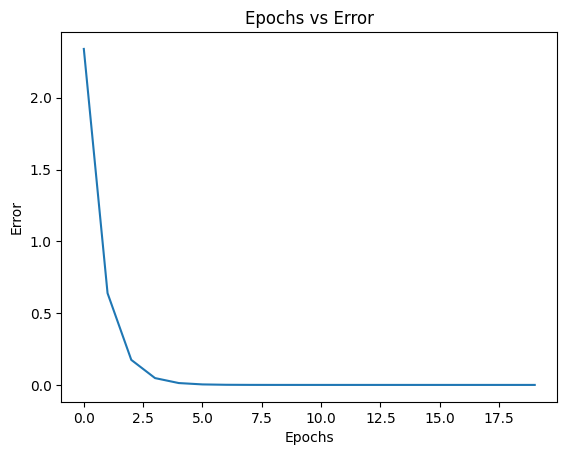

In [10]:
plt.plot(range(epochs),errorList)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Epochs vs Error")